In [1]:
import pandas as pd
import numpy as np
import keras 

Using TensorFlow backend.


C. Increate the number of epochs (5 marks)

Repeat Part B but use 100 epochs this time for training.

How does the mean of the mean squared errors compare to that from Step B?

In [2]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
concrete_data.shape

(1030, 9)

In [5]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

In [6]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [7]:
n_cols = predictors_norm.shape[1] # number of predictors

In [8]:
from keras.models import Sequential
from keras.layers import Dense

In [9]:
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, train_size=0.70,test_size=0.30,random_state=100)

In [12]:
# build the model
model = regression_model()

In [13]:
model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=2)

Train on 504 samples, validate on 217 samples
Epoch 1/100
 - 0s - loss: 1526.8196 - val_loss: 1502.7639
Epoch 2/100
 - 0s - loss: 1516.3424 - val_loss: 1491.2910
Epoch 3/100
 - 0s - loss: 1505.6117 - val_loss: 1479.9238
Epoch 4/100
 - 0s - loss: 1494.9746 - val_loss: 1468.1178
Epoch 5/100
 - 0s - loss: 1483.9316 - val_loss: 1456.0564
Epoch 6/100
 - 0s - loss: 1472.4885 - val_loss: 1443.8133
Epoch 7/100
 - 0s - loss: 1460.8636 - val_loss: 1430.8557
Epoch 8/100
 - 0s - loss: 1448.5681 - val_loss: 1417.3381
Epoch 9/100
 - 0s - loss: 1435.7169 - val_loss: 1403.2806
Epoch 10/100
 - 0s - loss: 1422.4337 - val_loss: 1388.3979
Epoch 11/100
 - 0s - loss: 1408.2168 - val_loss: 1373.0933
Epoch 12/100
 - 0s - loss: 1393.7569 - val_loss: 1356.8640
Epoch 13/100
 - 0s - loss: 1378.1759 - val_loss: 1340.3183
Epoch 14/100
 - 0s - loss: 1362.2876 - val_loss: 1322.9231
Epoch 15/100
 - 0s - loss: 1345.7575 - val_loss: 1304.6276
Epoch 16/100
 - 0s - loss: 1328.4425 - val_loss: 1285.7957
Epoch 17/100
 - 0s 

In [14]:
y_predicted = model.predict(X_test)

In [15]:
# model evaluation for testing set
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_squared_error(y_test, y_predicted)
r2 = metrics.r2_score(y_test, y_predicted)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 11.833442135474444
MSE is 229.47385285290406
R2 score is 0.2471795796430153


In [16]:
result_mse=[]
for i in range(50):
    
    X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, train_size=0.70,test_size=0.30, random_state=100)
    model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=2)
    y_predicted = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_predicted)
    mse = metrics.mean_squared_error(y_test, y_predicted)
    r2 = metrics.r2_score(y_test, y_predicted)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('MAE is {}'.format(mae))
    print('MSE is {}'.format(mse))
    print('R2 score is {}'.format(r2))
    result_mse.append(mse)
    
result_mse    

Train on 504 samples, validate on 217 samples
Epoch 1/100
 - 0s - loss: 199.3691 - val_loss: 239.8614
Epoch 2/100
 - 0s - loss: 197.5299 - val_loss: 238.4337
Epoch 3/100
 - 0s - loss: 195.8120 - val_loss: 236.9945
Epoch 4/100
 - 0s - loss: 194.1008 - val_loss: 235.3541
Epoch 5/100
 - 0s - loss: 192.4506 - val_loss: 233.8424
Epoch 6/100
 - 0s - loss: 190.9103 - val_loss: 232.3031
Epoch 7/100
 - 0s - loss: 189.2275 - val_loss: 230.6972
Epoch 8/100
 - 0s - loss: 187.7517 - val_loss: 229.7183
Epoch 9/100
 - 0s - loss: 186.2210 - val_loss: 227.9736
Epoch 10/100
 - 0s - loss: 184.8224 - val_loss: 226.0108
Epoch 11/100
 - 0s - loss: 183.3517 - val_loss: 225.0775
Epoch 12/100
 - 0s - loss: 181.9306 - val_loss: 223.5106
Epoch 13/100
 - 0s - loss: 180.5701 - val_loss: 221.6601
Epoch 14/100
 - 0s - loss: 179.1937 - val_loss: 220.0887
Epoch 15/100
 - 0s - loss: 177.8945 - val_loss: 218.6244
Epoch 16/100
 - 0s - loss: 176.6027 - val_loss: 216.8233
Epoch 17/100
 - 0s - loss: 175.3344 - val_loss: 215

 - 0s - loss: 87.0590 - val_loss: 102.1542
Epoch 42/100
 - 0s - loss: 86.5670 - val_loss: 101.3993
Epoch 43/100
 - 0s - loss: 86.1885 - val_loss: 100.4155
Epoch 44/100
 - 0s - loss: 85.6744 - val_loss: 100.4481
Epoch 45/100
 - 0s - loss: 85.2617 - val_loss: 99.7209
Epoch 46/100
 - 0s - loss: 84.7301 - val_loss: 99.2933
Epoch 47/100
 - 0s - loss: 84.3222 - val_loss: 98.9877
Epoch 48/100
 - 0s - loss: 83.8968 - val_loss: 98.5169
Epoch 49/100
 - 0s - loss: 83.4667 - val_loss: 97.9252
Epoch 50/100
 - 0s - loss: 83.0294 - val_loss: 97.1186
Epoch 51/100
 - 0s - loss: 82.6255 - val_loss: 96.7707
Epoch 52/100
 - 0s - loss: 82.2269 - val_loss: 96.1878
Epoch 53/100
 - 0s - loss: 81.8056 - val_loss: 95.8167
Epoch 54/100
 - 0s - loss: 81.3908 - val_loss: 95.1195
Epoch 55/100
 - 0s - loss: 81.0036 - val_loss: 94.5694
Epoch 56/100
 - 0s - loss: 80.5865 - val_loss: 94.1422
Epoch 57/100
 - 0s - loss: 80.1782 - val_loss: 93.9469
Epoch 58/100
 - 0s - loss: 79.7863 - val_loss: 93.2405
Epoch 59/100
 - 0s 

Epoch 87/100
 - 0s - loss: 47.3162 - val_loss: 63.1153
Epoch 88/100
 - 0s - loss: 47.1950 - val_loss: 62.6327
Epoch 89/100
 - 0s - loss: 47.0539 - val_loss: 63.0664
Epoch 90/100
 - 0s - loss: 46.9444 - val_loss: 63.0995
Epoch 91/100
 - 0s - loss: 46.7648 - val_loss: 62.4076
Epoch 92/100
 - 0s - loss: 46.6475 - val_loss: 62.4547
Epoch 93/100
 - 0s - loss: 46.4929 - val_loss: 62.6468
Epoch 94/100
 - 0s - loss: 46.4621 - val_loss: 62.6827
Epoch 95/100
 - 0s - loss: 46.2734 - val_loss: 62.1037
Epoch 96/100
 - 0s - loss: 46.1348 - val_loss: 61.9336
Epoch 97/100
 - 0s - loss: 45.9876 - val_loss: 62.3961
Epoch 98/100
 - 0s - loss: 45.8889 - val_loss: 62.1410
Epoch 99/100
 - 0s - loss: 45.7759 - val_loss: 62.3115
Epoch 100/100
 - 0s - loss: 45.6268 - val_loss: 61.9916
The model performance for testing set
--------------------------------------
MAE is 5.648283511658701
MSE is 56.82884120486207
R2 score is 0.8135651988565843
Train on 504 samples, validate on 217 samples
Epoch 1/100
 - 0s - loss:

Epoch 29/100
 - 0s - loss: 36.3045 - val_loss: 55.3038
Epoch 30/100
 - 0s - loss: 36.2616 - val_loss: 54.8050
Epoch 31/100
 - 0s - loss: 36.1440 - val_loss: 55.0518
Epoch 32/100
 - 0s - loss: 36.1358 - val_loss: 54.8533
Epoch 33/100
 - 0s - loss: 36.0721 - val_loss: 55.0794
Epoch 34/100
 - 0s - loss: 36.0264 - val_loss: 54.6924
Epoch 35/100
 - 0s - loss: 36.0358 - val_loss: 55.1655
Epoch 36/100
 - 0s - loss: 35.9700 - val_loss: 54.6588
Epoch 37/100
 - 0s - loss: 35.8861 - val_loss: 54.6884
Epoch 38/100
 - 0s - loss: 35.9212 - val_loss: 54.8664
Epoch 39/100
 - 0s - loss: 35.8913 - val_loss: 54.3407
Epoch 40/100
 - 0s - loss: 35.7836 - val_loss: 54.7447
Epoch 41/100
 - 0s - loss: 35.7540 - val_loss: 54.7881
Epoch 42/100
 - 0s - loss: 35.6840 - val_loss: 54.5941
Epoch 43/100
 - 0s - loss: 35.6542 - val_loss: 54.6301
Epoch 44/100
 - 0s - loss: 35.6077 - val_loss: 54.5482
Epoch 45/100
 - 0s - loss: 35.5968 - val_loss: 54.3390
Epoch 46/100
 - 0s - loss: 35.5607 - val_loss: 54.4870
Epoch 47/1

Epoch 75/100
 - 0s - loss: 31.8866 - val_loss: 51.4960
Epoch 76/100
 - 0s - loss: 31.8041 - val_loss: 51.4540
Epoch 77/100
 - 0s - loss: 31.7924 - val_loss: 51.2888
Epoch 78/100
 - 0s - loss: 31.8251 - val_loss: 51.3707
Epoch 79/100
 - 0s - loss: 31.8085 - val_loss: 51.4910
Epoch 80/100
 - 0s - loss: 31.8024 - val_loss: 51.2732
Epoch 81/100
 - 0s - loss: 31.7848 - val_loss: 51.2613
Epoch 82/100
 - 0s - loss: 31.7465 - val_loss: 51.4189
Epoch 83/100
 - 0s - loss: 31.7381 - val_loss: 51.0241
Epoch 84/100
 - 0s - loss: 31.7186 - val_loss: 51.3103
Epoch 85/100
 - 0s - loss: 31.6986 - val_loss: 51.3169
Epoch 86/100
 - 0s - loss: 31.6856 - val_loss: 51.1379
Epoch 87/100
 - 0s - loss: 31.6545 - val_loss: 51.4020
Epoch 88/100
 - 0s - loss: 31.6773 - val_loss: 51.0787
Epoch 89/100
 - 0s - loss: 31.6086 - val_loss: 50.8417
Epoch 90/100
 - 0s - loss: 31.6157 - val_loss: 50.9324
Epoch 91/100
 - 0s - loss: 31.5828 - val_loss: 51.1830
Epoch 92/100
 - 0s - loss: 31.6206 - val_loss: 51.3756
Epoch 93/1

Epoch 17/100
 - 0s - loss: 29.7718 - val_loss: 49.5602
Epoch 18/100
 - 0s - loss: 29.7892 - val_loss: 49.6333
Epoch 19/100
 - 0s - loss: 29.7343 - val_loss: 49.8206
Epoch 20/100
 - 0s - loss: 29.7466 - val_loss: 49.3386
Epoch 21/100
 - 0s - loss: 29.7772 - val_loss: 49.5354
Epoch 22/100
 - 0s - loss: 29.7253 - val_loss: 49.4703
Epoch 23/100
 - 0s - loss: 29.7319 - val_loss: 49.9630
Epoch 24/100
 - 0s - loss: 29.6731 - val_loss: 49.6009
Epoch 25/100
 - 0s - loss: 29.6947 - val_loss: 49.6507
Epoch 26/100
 - 0s - loss: 29.6572 - val_loss: 49.5015
Epoch 27/100
 - 0s - loss: 29.6816 - val_loss: 49.5519
Epoch 28/100
 - 0s - loss: 29.6175 - val_loss: 49.2282
Epoch 29/100
 - 0s - loss: 29.6391 - val_loss: 49.1508
Epoch 30/100
 - 0s - loss: 29.6455 - val_loss: 49.1470
Epoch 31/100
 - 0s - loss: 29.6695 - val_loss: 49.3611
Epoch 32/100
 - 0s - loss: 29.6012 - val_loss: 49.2050
Epoch 33/100
 - 0s - loss: 29.5829 - val_loss: 49.3306
Epoch 34/100
 - 0s - loss: 29.5742 - val_loss: 49.4962
Epoch 35/1

Epoch 63/100
 - 0s - loss: 28.4812 - val_loss: 48.8204
Epoch 64/100
 - 0s - loss: 28.4908 - val_loss: 48.7963
Epoch 65/100
 - 0s - loss: 28.5038 - val_loss: 48.2038
Epoch 66/100
 - 0s - loss: 28.4677 - val_loss: 48.5220
Epoch 67/100
 - 0s - loss: 28.4210 - val_loss: 48.5225
Epoch 68/100
 - 0s - loss: 28.4263 - val_loss: 48.4620
Epoch 69/100
 - 0s - loss: 28.4172 - val_loss: 48.3890
Epoch 70/100
 - 0s - loss: 28.3910 - val_loss: 48.6391
Epoch 71/100
 - 0s - loss: 28.4343 - val_loss: 48.5532
Epoch 72/100
 - 0s - loss: 28.4051 - val_loss: 48.5859
Epoch 73/100
 - 0s - loss: 28.4136 - val_loss: 48.2479
Epoch 74/100
 - 0s - loss: 28.4259 - val_loss: 48.5327
Epoch 75/100
 - 0s - loss: 28.3805 - val_loss: 48.6041
Epoch 76/100
 - 0s - loss: 28.3728 - val_loss: 48.6438
Epoch 77/100
 - 0s - loss: 28.3908 - val_loss: 48.5118
Epoch 78/100
 - 0s - loss: 28.3369 - val_loss: 48.4017
Epoch 79/100
 - 0s - loss: 28.3574 - val_loss: 48.2777
Epoch 80/100
 - 0s - loss: 28.3489 - val_loss: 48.4559
Epoch 81/1

Epoch 5/100
 - 0s - loss: 27.6411 - val_loss: 47.7707
Epoch 6/100
 - 0s - loss: 27.6452 - val_loss: 47.8496
Epoch 7/100
 - 0s - loss: 27.6983 - val_loss: 47.4790
Epoch 8/100
 - 0s - loss: 27.6340 - val_loss: 48.0049
Epoch 9/100
 - 0s - loss: 27.6584 - val_loss: 48.0904
Epoch 10/100
 - 0s - loss: 27.6399 - val_loss: 47.7619
Epoch 11/100
 - 0s - loss: 27.6707 - val_loss: 48.1102
Epoch 12/100
 - 0s - loss: 27.6262 - val_loss: 47.8091
Epoch 13/100
 - 0s - loss: 27.6827 - val_loss: 47.8119
Epoch 14/100
 - 0s - loss: 27.5906 - val_loss: 47.9573
Epoch 15/100
 - 0s - loss: 27.6129 - val_loss: 47.8435
Epoch 16/100
 - 0s - loss: 27.5928 - val_loss: 47.9037
Epoch 17/100
 - 0s - loss: 27.5928 - val_loss: 47.8802
Epoch 18/100
 - 0s - loss: 27.6025 - val_loss: 48.0008
Epoch 19/100
 - 0s - loss: 27.5761 - val_loss: 47.4325
Epoch 20/100
 - 0s - loss: 27.5873 - val_loss: 47.7129
Epoch 21/100
 - 0s - loss: 27.5702 - val_loss: 47.9561
Epoch 22/100
 - 0s - loss: 27.6335 - val_loss: 48.2199
Epoch 23/100
 -

Epoch 51/100
 - 0s - loss: 27.1942 - val_loss: 47.5869
Epoch 52/100
 - 0s - loss: 27.2728 - val_loss: 46.7890
Epoch 53/100
 - 0s - loss: 27.1533 - val_loss: 47.0618
Epoch 54/100
 - 0s - loss: 27.1523 - val_loss: 47.4735
Epoch 55/100
 - 0s - loss: 27.1547 - val_loss: 47.3630
Epoch 56/100
 - 0s - loss: 27.1341 - val_loss: 47.2820
Epoch 57/100
 - 0s - loss: 27.1787 - val_loss: 47.3163
Epoch 58/100
 - 0s - loss: 27.1654 - val_loss: 47.0245
Epoch 59/100
 - 0s - loss: 27.1819 - val_loss: 47.1486
Epoch 60/100
 - 0s - loss: 27.1627 - val_loss: 47.1755
Epoch 61/100
 - 0s - loss: 27.1176 - val_loss: 46.9921
Epoch 62/100
 - 0s - loss: 27.1770 - val_loss: 47.3352
Epoch 63/100
 - 0s - loss: 27.1618 - val_loss: 46.9799
Epoch 64/100
 - 0s - loss: 27.1212 - val_loss: 47.3094
Epoch 65/100
 - 0s - loss: 27.1477 - val_loss: 46.9657
Epoch 66/100
 - 0s - loss: 27.1446 - val_loss: 47.3735
Epoch 67/100
 - 0s - loss: 27.1179 - val_loss: 47.1366
Epoch 68/100
 - 0s - loss: 27.1432 - val_loss: 47.0572
Epoch 69/1

Epoch 97/100
 - 0s - loss: 26.8558 - val_loss: 46.9680
Epoch 98/100
 - 0s - loss: 26.8883 - val_loss: 47.0530
Epoch 99/100
 - 0s - loss: 26.8623 - val_loss: 46.7324
Epoch 100/100
 - 0s - loss: 26.8661 - val_loss: 47.0466
The model performance for testing set
--------------------------------------
MAE is 4.893907675017817
MSE is 43.58901465773561
R2 score is 0.8570002641711952
Train on 504 samples, validate on 217 samples
Epoch 1/100
 - 0s - loss: 26.8576 - val_loss: 46.6677
Epoch 2/100
 - 0s - loss: 26.8624 - val_loss: 47.0186
Epoch 3/100
 - 0s - loss: 26.8234 - val_loss: 46.8268
Epoch 4/100
 - 0s - loss: 26.8413 - val_loss: 46.9318
Epoch 5/100
 - 0s - loss: 26.8941 - val_loss: 46.8987
Epoch 6/100
 - 0s - loss: 26.9008 - val_loss: 46.5788
Epoch 7/100
 - 0s - loss: 26.8384 - val_loss: 46.9011
Epoch 8/100
 - 0s - loss: 26.8799 - val_loss: 46.9294
Epoch 9/100
 - 0s - loss: 26.8435 - val_loss: 46.6784
Epoch 10/100
 - 0s - loss: 26.8320 - val_loss: 46.9150
Epoch 11/100
 - 0s - loss: 26.8459

Epoch 39/100
 - 0s - loss: 26.7228 - val_loss: 46.5343
Epoch 40/100
 - 0s - loss: 26.6830 - val_loss: 46.9559
Epoch 41/100
 - 0s - loss: 26.6543 - val_loss: 46.5938
Epoch 42/100
 - 0s - loss: 26.6528 - val_loss: 46.6984
Epoch 43/100
 - 0s - loss: 26.7007 - val_loss: 46.5447
Epoch 44/100
 - 0s - loss: 26.6357 - val_loss: 46.5784
Epoch 45/100
 - 0s - loss: 26.6901 - val_loss: 46.4336
Epoch 46/100
 - 0s - loss: 26.6789 - val_loss: 46.6018
Epoch 47/100
 - 0s - loss: 26.6995 - val_loss: 47.0499
Epoch 48/100
 - 0s - loss: 26.7110 - val_loss: 46.6112
Epoch 49/100
 - 0s - loss: 26.6766 - val_loss: 46.5466
Epoch 50/100
 - 0s - loss: 26.6542 - val_loss: 46.8224
Epoch 51/100
 - 0s - loss: 26.6593 - val_loss: 46.6427
Epoch 52/100
 - 0s - loss: 26.6759 - val_loss: 47.0052
Epoch 53/100
 - 0s - loss: 26.6314 - val_loss: 46.6036
Epoch 54/100
 - 0s - loss: 26.6780 - val_loss: 46.5725
Epoch 55/100
 - 0s - loss: 26.6547 - val_loss: 46.6185
Epoch 56/100
 - 0s - loss: 26.6626 - val_loss: 46.8308
Epoch 57/1

Epoch 85/100
 - 0s - loss: 26.5109 - val_loss: 46.3187
Epoch 86/100
 - 0s - loss: 26.4964 - val_loss: 46.1510
Epoch 87/100
 - 0s - loss: 26.5238 - val_loss: 46.1676
Epoch 88/100
 - 0s - loss: 26.5276 - val_loss: 46.3072
Epoch 89/100
 - 0s - loss: 26.5395 - val_loss: 46.3205
Epoch 90/100
 - 0s - loss: 26.5679 - val_loss: 46.4169
Epoch 91/100
 - 0s - loss: 26.5186 - val_loss: 46.2252
Epoch 92/100
 - 0s - loss: 26.5075 - val_loss: 46.4957
Epoch 93/100
 - 0s - loss: 26.5302 - val_loss: 46.5941
Epoch 94/100
 - 0s - loss: 26.5458 - val_loss: 46.1940
Epoch 95/100
 - 0s - loss: 26.4828 - val_loss: 46.4561
Epoch 96/100
 - 0s - loss: 26.4996 - val_loss: 46.4154
Epoch 97/100
 - 0s - loss: 26.5560 - val_loss: 46.5622
Epoch 98/100
 - 0s - loss: 26.5078 - val_loss: 46.1704
Epoch 99/100
 - 0s - loss: 26.5008 - val_loss: 46.2091
Epoch 100/100
 - 0s - loss: 26.4926 - val_loss: 46.2019
The model performance for testing set
--------------------------------------
MAE is 4.875971250194562
MSE is 43.0538572

Epoch 27/100
 - 0s - loss: 26.3801 - val_loss: 46.1879
Epoch 28/100
 - 0s - loss: 26.3918 - val_loss: 46.3324
Epoch 29/100
 - 0s - loss: 26.4125 - val_loss: 46.0238
Epoch 30/100
 - 0s - loss: 26.3802 - val_loss: 46.1645
Epoch 31/100
 - 0s - loss: 26.3930 - val_loss: 46.2022
Epoch 32/100
 - 0s - loss: 26.3961 - val_loss: 46.0783
Epoch 33/100
 - 0s - loss: 26.4693 - val_loss: 46.6076
Epoch 34/100
 - 0s - loss: 26.3653 - val_loss: 46.2979
Epoch 35/100
 - 0s - loss: 26.3724 - val_loss: 46.2083
Epoch 36/100
 - 0s - loss: 26.4056 - val_loss: 46.4743
Epoch 37/100
 - 0s - loss: 26.4204 - val_loss: 45.9276
Epoch 38/100
 - 0s - loss: 26.3885 - val_loss: 46.2246
Epoch 39/100
 - 0s - loss: 26.3717 - val_loss: 46.1352
Epoch 40/100
 - 0s - loss: 26.3790 - val_loss: 46.1730
Epoch 41/100
 - 0s - loss: 26.3641 - val_loss: 46.3702
Epoch 42/100
 - 0s - loss: 26.3634 - val_loss: 46.2760
Epoch 43/100
 - 0s - loss: 26.3754 - val_loss: 46.2971
Epoch 44/100
 - 0s - loss: 26.3535 - val_loss: 46.2651
Epoch 45/1

Epoch 73/100
 - 0s - loss: 26.2963 - val_loss: 46.1289
Epoch 74/100
 - 0s - loss: 26.2625 - val_loss: 46.1455
Epoch 75/100
 - 0s - loss: 26.2594 - val_loss: 46.2498
Epoch 76/100
 - 0s - loss: 26.2603 - val_loss: 46.3082
Epoch 77/100
 - 0s - loss: 26.2399 - val_loss: 46.3153
Epoch 78/100
 - 0s - loss: 26.2534 - val_loss: 46.1060
Epoch 79/100
 - 0s - loss: 26.2886 - val_loss: 45.8942
Epoch 80/100
 - 0s - loss: 26.2441 - val_loss: 46.1805
Epoch 81/100
 - 0s - loss: 26.2646 - val_loss: 46.2040
Epoch 82/100
 - 0s - loss: 26.2302 - val_loss: 45.9303
Epoch 83/100
 - 0s - loss: 26.2616 - val_loss: 46.0120
Epoch 84/100
 - 0s - loss: 26.2443 - val_loss: 46.0125
Epoch 85/100
 - 0s - loss: 26.2686 - val_loss: 45.8890
Epoch 86/100
 - 0s - loss: 26.2327 - val_loss: 46.1278
Epoch 87/100
 - 0s - loss: 26.2364 - val_loss: 46.0892
Epoch 88/100
 - 0s - loss: 26.2391 - val_loss: 46.0656
Epoch 89/100
 - 0s - loss: 26.2602 - val_loss: 46.0302
Epoch 90/100
 - 0s - loss: 26.2675 - val_loss: 46.3557
Epoch 91/1

Epoch 15/100
 - 0s - loss: 26.1893 - val_loss: 45.6786
Epoch 16/100
 - 0s - loss: 26.1554 - val_loss: 45.8228
Epoch 17/100
 - 0s - loss: 26.1484 - val_loss: 45.6668
Epoch 18/100
 - 0s - loss: 26.1965 - val_loss: 46.3307
Epoch 19/100
 - 0s - loss: 26.1371 - val_loss: 45.6893
Epoch 20/100
 - 0s - loss: 26.1466 - val_loss: 45.9023
Epoch 21/100
 - 0s - loss: 26.1448 - val_loss: 45.8174
Epoch 22/100
 - 0s - loss: 26.1419 - val_loss: 45.9751
Epoch 23/100
 - 0s - loss: 26.1300 - val_loss: 45.7980
Epoch 24/100
 - 0s - loss: 26.1348 - val_loss: 45.6043
Epoch 25/100
 - 0s - loss: 26.1379 - val_loss: 45.7698
Epoch 26/100
 - 0s - loss: 26.2128 - val_loss: 45.8046
Epoch 27/100
 - 0s - loss: 26.1351 - val_loss: 46.0533
Epoch 28/100
 - 0s - loss: 26.1485 - val_loss: 45.8210
Epoch 29/100
 - 0s - loss: 26.1662 - val_loss: 45.5942
Epoch 30/100
 - 0s - loss: 26.1510 - val_loss: 46.0368
Epoch 31/100
 - 0s - loss: 26.1151 - val_loss: 46.1510
Epoch 32/100
 - 0s - loss: 26.1068 - val_loss: 45.7546
Epoch 33/1

Epoch 61/100
 - 0s - loss: 26.0330 - val_loss: 45.6073
Epoch 62/100
 - 0s - loss: 26.0363 - val_loss: 45.7132
Epoch 63/100
 - 0s - loss: 26.0468 - val_loss: 45.8322
Epoch 64/100
 - 0s - loss: 26.0400 - val_loss: 45.4893
Epoch 65/100
 - 0s - loss: 26.0707 - val_loss: 45.4827
Epoch 66/100
 - 0s - loss: 26.0074 - val_loss: 45.5955
Epoch 67/100
 - 0s - loss: 26.0338 - val_loss: 45.9283
Epoch 68/100
 - 0s - loss: 26.0305 - val_loss: 45.8759
Epoch 69/100
 - 0s - loss: 26.0567 - val_loss: 45.7341
Epoch 70/100
 - 0s - loss: 26.0510 - val_loss: 45.6809
Epoch 71/100
 - 0s - loss: 26.0427 - val_loss: 45.7152
Epoch 72/100
 - 0s - loss: 26.0307 - val_loss: 45.4378
Epoch 73/100
 - 0s - loss: 26.0172 - val_loss: 45.6539
Epoch 74/100
 - 0s - loss: 26.0223 - val_loss: 45.6232
Epoch 75/100
 - 0s - loss: 26.0170 - val_loss: 45.7492
Epoch 76/100
 - 0s - loss: 26.0347 - val_loss: 45.6351
Epoch 77/100
 - 0s - loss: 26.0303 - val_loss: 45.7582
Epoch 78/100
 - 0s - loss: 26.0224 - val_loss: 45.8540
Epoch 79/1

Epoch 3/100
 - 0s - loss: 25.9707 - val_loss: 45.3515
Epoch 4/100
 - 0s - loss: 25.9897 - val_loss: 45.8357
Epoch 5/100
 - 0s - loss: 25.9438 - val_loss: 45.8126
Epoch 6/100
 - 0s - loss: 25.9328 - val_loss: 45.8722
Epoch 7/100
 - 0s - loss: 25.9548 - val_loss: 45.4952
Epoch 8/100
 - 0s - loss: 25.9544 - val_loss: 45.5435
Epoch 9/100
 - 0s - loss: 25.9238 - val_loss: 45.7333
Epoch 10/100
 - 0s - loss: 25.9015 - val_loss: 45.5433
Epoch 11/100
 - 0s - loss: 25.9341 - val_loss: 45.4797
Epoch 12/100
 - 0s - loss: 25.9430 - val_loss: 45.6366
Epoch 13/100
 - 0s - loss: 25.9504 - val_loss: 45.4847
Epoch 14/100
 - 0s - loss: 25.9794 - val_loss: 45.5123
Epoch 15/100
 - 0s - loss: 25.9321 - val_loss: 45.9094
Epoch 16/100
 - 0s - loss: 25.9252 - val_loss: 45.6601
Epoch 17/100
 - 0s - loss: 25.9409 - val_loss: 45.6265
Epoch 18/100
 - 0s - loss: 25.9637 - val_loss: 45.5039
Epoch 19/100
 - 0s - loss: 25.9441 - val_loss: 45.5000
Epoch 20/100
 - 0s - loss: 25.9146 - val_loss: 45.4508
Epoch 21/100
 - 0

Epoch 49/100
 - 0s - loss: 25.7891 - val_loss: 45.4884
Epoch 50/100
 - 0s - loss: 25.7854 - val_loss: 45.5915
Epoch 51/100
 - 0s - loss: 25.8203 - val_loss: 45.4484
Epoch 52/100
 - 0s - loss: 25.7963 - val_loss: 45.3171
Epoch 53/100
 - 0s - loss: 25.8113 - val_loss: 45.5841
Epoch 54/100
 - 0s - loss: 25.8160 - val_loss: 45.3765
Epoch 55/100
 - 0s - loss: 25.8008 - val_loss: 45.4002
Epoch 56/100
 - 0s - loss: 25.8412 - val_loss: 45.2333
Epoch 57/100
 - 0s - loss: 25.7864 - val_loss: 45.4988
Epoch 58/100
 - 0s - loss: 25.7920 - val_loss: 45.6305
Epoch 59/100
 - 0s - loss: 25.8084 - val_loss: 45.4530
Epoch 60/100
 - 0s - loss: 25.8465 - val_loss: 45.2509
Epoch 61/100
 - 0s - loss: 25.7824 - val_loss: 45.2862
Epoch 62/100
 - 0s - loss: 25.7897 - val_loss: 45.3716
Epoch 63/100
 - 0s - loss: 25.7702 - val_loss: 45.5030
Epoch 64/100
 - 0s - loss: 25.7945 - val_loss: 45.5976
Epoch 65/100
 - 0s - loss: 25.8134 - val_loss: 45.2928
Epoch 66/100
 - 0s - loss: 25.8262 - val_loss: 45.5635
Epoch 67/1

Epoch 95/100
 - 0s - loss: 25.6629 - val_loss: 45.1988
Epoch 96/100
 - 0s - loss: 25.6754 - val_loss: 45.2289
Epoch 97/100
 - 0s - loss: 25.6637 - val_loss: 45.3192
Epoch 98/100
 - 0s - loss: 25.6604 - val_loss: 45.2755
Epoch 99/100
 - 0s - loss: 25.6512 - val_loss: 45.6262
Epoch 100/100
 - 0s - loss: 25.6852 - val_loss: 45.6498
The model performance for testing set
--------------------------------------
MAE is 4.835587307149153
MSE is 42.22730057324407
R2 score is 0.8614675538285927
Train on 504 samples, validate on 217 samples
Epoch 1/100
 - 0s - loss: 25.6841 - val_loss: 45.3200
Epoch 2/100
 - 0s - loss: 25.6507 - val_loss: 45.5141
Epoch 3/100
 - 0s - loss: 25.6968 - val_loss: 45.5855
Epoch 4/100
 - 0s - loss: 25.6757 - val_loss: 45.1217
Epoch 5/100
 - 0s - loss: 25.6976 - val_loss: 45.0307
Epoch 6/100
 - 0s - loss: 25.6590 - val_loss: 45.5562
Epoch 7/100
 - 0s - loss: 25.6597 - val_loss: 45.6517
Epoch 8/100
 - 0s - loss: 25.6741 - val_loss: 45.4686
Epoch 9/100
 - 0s - loss: 25.6924

Epoch 37/100
 - 0s - loss: 25.5408 - val_loss: 45.0734
Epoch 38/100
 - 0s - loss: 25.5228 - val_loss: 45.3117
Epoch 39/100
 - 0s - loss: 25.5121 - val_loss: 45.3148
Epoch 40/100
 - 0s - loss: 25.5235 - val_loss: 45.3210
Epoch 41/100
 - 0s - loss: 25.5014 - val_loss: 45.4482
Epoch 42/100
 - 0s - loss: 25.5819 - val_loss: 45.4644
Epoch 43/100
 - 0s - loss: 25.5610 - val_loss: 44.6952
Epoch 44/100
 - 0s - loss: 25.5652 - val_loss: 45.2467
Epoch 45/100
 - 0s - loss: 25.5317 - val_loss: 45.4511
Epoch 46/100
 - 0s - loss: 25.5284 - val_loss: 45.1430
Epoch 47/100
 - 0s - loss: 25.5020 - val_loss: 45.1484
Epoch 48/100
 - 0s - loss: 25.5158 - val_loss: 45.0735
Epoch 49/100
 - 0s - loss: 25.5601 - val_loss: 45.1695
Epoch 50/100
 - 0s - loss: 25.5753 - val_loss: 45.0044
Epoch 51/100
 - 0s - loss: 25.4986 - val_loss: 45.1420
Epoch 52/100
 - 0s - loss: 25.5002 - val_loss: 45.4740
Epoch 53/100
 - 0s - loss: 25.5497 - val_loss: 45.1159
Epoch 54/100
 - 0s - loss: 25.5027 - val_loss: 45.4210
Epoch 55/1

Epoch 83/100
 - 0s - loss: 25.3843 - val_loss: 45.0576
Epoch 84/100
 - 0s - loss: 25.3863 - val_loss: 44.9896
Epoch 85/100
 - 0s - loss: 25.4160 - val_loss: 45.0357
Epoch 86/100
 - 0s - loss: 25.3808 - val_loss: 45.2912
Epoch 87/100
 - 0s - loss: 25.3547 - val_loss: 45.2170
Epoch 88/100
 - 0s - loss: 25.3963 - val_loss: 45.0170
Epoch 89/100
 - 0s - loss: 25.3729 - val_loss: 45.3579
Epoch 90/100
 - 0s - loss: 25.3779 - val_loss: 45.3231
Epoch 91/100
 - 0s - loss: 25.3596 - val_loss: 45.3291
Epoch 92/100
 - 0s - loss: 25.3684 - val_loss: 45.2097
Epoch 93/100
 - 0s - loss: 25.3651 - val_loss: 45.0993
Epoch 94/100
 - 0s - loss: 25.3995 - val_loss: 45.3266
Epoch 95/100
 - 0s - loss: 25.4210 - val_loss: 45.5373
Epoch 96/100
 - 0s - loss: 25.3738 - val_loss: 44.9993
Epoch 97/100
 - 0s - loss: 25.3997 - val_loss: 44.8134
Epoch 98/100
 - 0s - loss: 25.3309 - val_loss: 45.1818
Epoch 99/100
 - 0s - loss: 25.3677 - val_loss: 45.2886
Epoch 100/100
 - 0s - loss: 25.3421 - val_loss: 45.4233
The model

Epoch 25/100
 - 0s - loss: 25.3117 - val_loss: 45.5566
Epoch 26/100
 - 0s - loss: 25.2992 - val_loss: 45.0614
Epoch 27/100
 - 0s - loss: 25.3134 - val_loss: 45.2446
Epoch 28/100
 - 0s - loss: 25.2760 - val_loss: 45.5168
Epoch 29/100
 - 0s - loss: 25.2877 - val_loss: 45.2361
Epoch 30/100
 - 0s - loss: 25.2678 - val_loss: 45.3875
Epoch 31/100
 - 0s - loss: 25.2957 - val_loss: 45.6252
Epoch 32/100
 - 0s - loss: 25.2556 - val_loss: 45.4359
Epoch 33/100
 - 0s - loss: 25.2575 - val_loss: 45.4144
Epoch 34/100
 - 0s - loss: 25.2628 - val_loss: 45.2827
Epoch 35/100
 - 0s - loss: 25.3092 - val_loss: 45.1503
Epoch 36/100
 - 0s - loss: 25.2819 - val_loss: 45.4579
Epoch 37/100
 - 0s - loss: 25.2514 - val_loss: 45.3527
Epoch 38/100
 - 0s - loss: 25.3326 - val_loss: 45.2763
Epoch 39/100
 - 0s - loss: 25.2765 - val_loss: 45.2349
Epoch 40/100
 - 0s - loss: 25.2648 - val_loss: 45.6245
Epoch 41/100
 - 0s - loss: 25.2456 - val_loss: 45.4675
Epoch 42/100
 - 0s - loss: 25.2527 - val_loss: 45.4209
Epoch 43/1

Epoch 71/100
 - 0s - loss: 25.2171 - val_loss: 45.5214
Epoch 72/100
 - 0s - loss: 25.2766 - val_loss: 44.9674
Epoch 73/100
 - 0s - loss: 25.2086 - val_loss: 45.5950
Epoch 74/100
 - 0s - loss: 25.1924 - val_loss: 45.5092
Epoch 75/100
 - 0s - loss: 25.2404 - val_loss: 45.6121
Epoch 76/100
 - 0s - loss: 25.2275 - val_loss: 45.2515
Epoch 77/100
 - 0s - loss: 25.2431 - val_loss: 45.4967
Epoch 78/100
 - 0s - loss: 25.2614 - val_loss: 45.5655
Epoch 79/100
 - 0s - loss: 25.2067 - val_loss: 45.3095
Epoch 80/100
 - 0s - loss: 25.2345 - val_loss: 45.0201
Epoch 81/100
 - 0s - loss: 25.2011 - val_loss: 45.1111
Epoch 82/100
 - 0s - loss: 25.2469 - val_loss: 45.7959
Epoch 83/100
 - 0s - loss: 25.2342 - val_loss: 45.3562
Epoch 84/100
 - 0s - loss: 25.2271 - val_loss: 45.5578
Epoch 85/100
 - 0s - loss: 25.2098 - val_loss: 45.4502
Epoch 86/100
 - 0s - loss: 25.1945 - val_loss: 45.4167
Epoch 87/100
 - 0s - loss: 25.2095 - val_loss: 45.3747
Epoch 88/100
 - 0s - loss: 25.1818 - val_loss: 45.2755
Epoch 89/1

Epoch 13/100
 - 0s - loss: 25.1905 - val_loss: 45.4024
Epoch 14/100
 - 0s - loss: 25.1983 - val_loss: 44.9084
Epoch 15/100
 - 0s - loss: 25.1654 - val_loss: 45.1917
Epoch 16/100
 - 0s - loss: 25.1430 - val_loss: 45.4316
Epoch 17/100
 - 0s - loss: 25.1612 - val_loss: 45.4096
Epoch 18/100
 - 0s - loss: 25.2129 - val_loss: 45.0773
Epoch 19/100
 - 0s - loss: 25.2089 - val_loss: 45.6163
Epoch 20/100
 - 0s - loss: 25.1322 - val_loss: 45.1124
Epoch 21/100
 - 0s - loss: 25.1238 - val_loss: 45.3696
Epoch 22/100
 - 0s - loss: 25.1534 - val_loss: 45.2761
Epoch 23/100
 - 0s - loss: 25.2437 - val_loss: 45.2254
Epoch 24/100
 - 0s - loss: 25.1866 - val_loss: 45.3016
Epoch 25/100
 - 0s - loss: 25.1745 - val_loss: 45.3696
Epoch 26/100
 - 0s - loss: 25.1179 - val_loss: 45.1334
Epoch 27/100
 - 0s - loss: 25.1677 - val_loss: 45.3578
Epoch 28/100
 - 0s - loss: 25.1274 - val_loss: 45.1534
Epoch 29/100
 - 0s - loss: 25.1585 - val_loss: 45.0182
Epoch 30/100
 - 0s - loss: 25.1532 - val_loss: 45.3275
Epoch 31/1

Epoch 59/100
 - 0s - loss: 25.0912 - val_loss: 45.1137
Epoch 60/100
 - 0s - loss: 25.0679 - val_loss: 45.2112
Epoch 61/100
 - 0s - loss: 25.1071 - val_loss: 45.3065
Epoch 62/100
 - 0s - loss: 25.1369 - val_loss: 44.9382
Epoch 63/100
 - 0s - loss: 25.1094 - val_loss: 45.3511
Epoch 64/100
 - 0s - loss: 25.1140 - val_loss: 45.3294
Epoch 65/100
 - 0s - loss: 25.0839 - val_loss: 45.2938
Epoch 66/100
 - 0s - loss: 25.0960 - val_loss: 45.4092
Epoch 67/100
 - 0s - loss: 25.1002 - val_loss: 45.1227
Epoch 68/100
 - 0s - loss: 25.1065 - val_loss: 45.3671
Epoch 69/100
 - 0s - loss: 25.0763 - val_loss: 45.2079
Epoch 70/100
 - 0s - loss: 25.1436 - val_loss: 45.0533
Epoch 71/100
 - 0s - loss: 25.1094 - val_loss: 45.3805
Epoch 72/100
 - 0s - loss: 25.0884 - val_loss: 45.3759
Epoch 73/100
 - 0s - loss: 25.1444 - val_loss: 44.9197
Epoch 74/100
 - 0s - loss: 25.1478 - val_loss: 45.3858
Epoch 75/100
 - 0s - loss: 25.1037 - val_loss: 45.3439
Epoch 76/100
 - 0s - loss: 25.1028 - val_loss: 45.1798
Epoch 77/1

Epoch 1/100
 - 0s - loss: 25.0586 - val_loss: 45.1506
Epoch 2/100
 - 0s - loss: 25.0557 - val_loss: 44.9176
Epoch 3/100
 - 0s - loss: 25.0906 - val_loss: 45.1756
Epoch 4/100
 - 0s - loss: 25.1207 - val_loss: 45.1038
Epoch 5/100
 - 0s - loss: 25.0513 - val_loss: 45.2193
Epoch 6/100
 - 0s - loss: 25.1644 - val_loss: 45.6679
Epoch 7/100
 - 0s - loss: 25.0528 - val_loss: 45.2947
Epoch 8/100
 - 0s - loss: 25.0449 - val_loss: 45.0441
Epoch 9/100
 - 0s - loss: 25.0662 - val_loss: 44.8804
Epoch 10/100
 - 0s - loss: 25.0997 - val_loss: 45.4558
Epoch 11/100
 - 0s - loss: 25.0477 - val_loss: 45.2181
Epoch 12/100
 - 0s - loss: 25.0783 - val_loss: 45.1866
Epoch 13/100
 - 0s - loss: 25.0451 - val_loss: 45.2983
Epoch 14/100
 - 0s - loss: 25.0817 - val_loss: 45.3068
Epoch 15/100
 - 0s - loss: 25.1041 - val_loss: 45.2977
Epoch 16/100
 - 0s - loss: 25.0707 - val_loss: 45.2431
Epoch 17/100
 - 0s - loss: 25.0362 - val_loss: 45.2051
Epoch 18/100
 - 0s - loss: 25.0420 - val_loss: 45.1743
Epoch 19/100
 - 0s 

Epoch 47/100
 - 0s - loss: 25.0193 - val_loss: 45.2448
Epoch 48/100
 - 0s - loss: 25.0689 - val_loss: 45.1454
Epoch 49/100
 - 0s - loss: 25.0491 - val_loss: 45.1919
Epoch 50/100
 - 0s - loss: 25.0037 - val_loss: 45.0888
Epoch 51/100
 - 0s - loss: 25.0468 - val_loss: 45.3387
Epoch 52/100
 - 0s - loss: 25.0130 - val_loss: 44.9831
Epoch 53/100
 - 0s - loss: 25.0343 - val_loss: 44.9466
Epoch 54/100
 - 0s - loss: 25.0554 - val_loss: 45.2056
Epoch 55/100
 - 0s - loss: 25.0848 - val_loss: 44.8660
Epoch 56/100
 - 0s - loss: 25.0088 - val_loss: 45.1914
Epoch 57/100
 - 0s - loss: 25.0117 - val_loss: 45.4460
Epoch 58/100
 - 0s - loss: 25.0946 - val_loss: 45.3811
Epoch 59/100
 - 0s - loss: 25.0564 - val_loss: 45.4184
Epoch 60/100
 - 0s - loss: 25.0061 - val_loss: 45.2259
Epoch 61/100
 - 0s - loss: 25.0193 - val_loss: 45.2346
Epoch 62/100
 - 0s - loss: 24.9739 - val_loss: 45.4052
Epoch 63/100
 - 0s - loss: 25.0201 - val_loss: 45.3056
Epoch 64/100
 - 0s - loss: 25.0319 - val_loss: 45.4157
Epoch 65/1

Epoch 93/100
 - 0s - loss: 25.0007 - val_loss: 45.3686
Epoch 94/100
 - 0s - loss: 24.9439 - val_loss: 45.3551
Epoch 95/100
 - 0s - loss: 25.0017 - val_loss: 45.0690
Epoch 96/100
 - 0s - loss: 24.9695 - val_loss: 45.4244
Epoch 97/100
 - 0s - loss: 24.9830 - val_loss: 45.3409
Epoch 98/100
 - 0s - loss: 24.9822 - val_loss: 45.5582
Epoch 99/100
 - 0s - loss: 24.9847 - val_loss: 45.4073
Epoch 100/100
 - 0s - loss: 24.9941 - val_loss: 45.2806
The model performance for testing set
--------------------------------------
MAE is 4.786054168133289
MSE is 41.418578200545255
R2 score is 0.8641206783959372
Train on 504 samples, validate on 217 samples
Epoch 1/100
 - 0s - loss: 24.9652 - val_loss: 45.4385
Epoch 2/100
 - 0s - loss: 25.0097 - val_loss: 45.2723
Epoch 3/100
 - 0s - loss: 24.9574 - val_loss: 45.3589
Epoch 4/100
 - 0s - loss: 24.9562 - val_loss: 45.4723
Epoch 5/100
 - 0s - loss: 24.9938 - val_loss: 45.1217
Epoch 6/100
 - 0s - loss: 24.9782 - val_loss: 45.5912
Epoch 7/100
 - 0s - loss: 24.9

Epoch 35/100
 - 0s - loss: 24.9353 - val_loss: 45.1982
Epoch 36/100
 - 0s - loss: 24.9144 - val_loss: 45.3032
Epoch 37/100
 - 0s - loss: 24.8954 - val_loss: 45.1996
Epoch 38/100
 - 0s - loss: 24.9016 - val_loss: 45.3242
Epoch 39/100
 - 0s - loss: 24.9066 - val_loss: 45.3901
Epoch 40/100
 - 0s - loss: 24.9531 - val_loss: 45.6425
Epoch 41/100
 - 0s - loss: 24.9079 - val_loss: 45.0920
Epoch 42/100
 - 0s - loss: 24.9162 - val_loss: 45.0807
Epoch 43/100
 - 0s - loss: 24.9331 - val_loss: 45.4868
Epoch 44/100
 - 0s - loss: 24.9182 - val_loss: 45.4357
Epoch 45/100
 - 0s - loss: 24.9701 - val_loss: 44.9353
Epoch 46/100
 - 0s - loss: 24.9552 - val_loss: 45.1975
Epoch 47/100
 - 0s - loss: 24.8993 - val_loss: 45.4227
Epoch 48/100
 - 0s - loss: 24.9209 - val_loss: 45.4575
Epoch 49/100
 - 0s - loss: 24.9879 - val_loss: 45.4013
Epoch 50/100
 - 0s - loss: 24.9065 - val_loss: 45.5375
Epoch 51/100
 - 0s - loss: 24.9513 - val_loss: 45.3539
Epoch 52/100
 - 0s - loss: 24.9128 - val_loss: 45.3298
Epoch 53/1

Epoch 81/100
 - 0s - loss: 24.8744 - val_loss: 45.2255
Epoch 82/100
 - 0s - loss: 24.9163 - val_loss: 45.0683
Epoch 83/100
 - 0s - loss: 24.8913 - val_loss: 45.2448
Epoch 84/100
 - 0s - loss: 24.8855 - val_loss: 45.4961
Epoch 85/100
 - 0s - loss: 24.8985 - val_loss: 45.0974
Epoch 86/100
 - 0s - loss: 24.8623 - val_loss: 45.5083
Epoch 87/100
 - 0s - loss: 24.8970 - val_loss: 45.4924
Epoch 88/100
 - 0s - loss: 24.8689 - val_loss: 45.4302
Epoch 89/100
 - 0s - loss: 24.8647 - val_loss: 45.2407
Epoch 90/100
 - 0s - loss: 24.9224 - val_loss: 45.1200
Epoch 91/100
 - 0s - loss: 24.8714 - val_loss: 45.0149
Epoch 92/100
 - 0s - loss: 24.8636 - val_loss: 45.3568
Epoch 93/100
 - 0s - loss: 24.8612 - val_loss: 45.3288
Epoch 94/100
 - 0s - loss: 24.8699 - val_loss: 45.3079
Epoch 95/100
 - 0s - loss: 24.8647 - val_loss: 45.1732
Epoch 96/100
 - 0s - loss: 24.8625 - val_loss: 45.5754
Epoch 97/100
 - 0s - loss: 24.8784 - val_loss: 45.1292
Epoch 98/100
 - 0s - loss: 24.9039 - val_loss: 45.1848
Epoch 99/1

Epoch 23/100
 - 0s - loss: 24.8499 - val_loss: 45.2176
Epoch 24/100
 - 0s - loss: 24.8645 - val_loss: 45.5007
Epoch 25/100
 - 0s - loss: 24.8233 - val_loss: 45.1717
Epoch 26/100
 - 0s - loss: 24.8487 - val_loss: 45.1934
Epoch 27/100
 - 0s - loss: 24.8447 - val_loss: 45.1378
Epoch 28/100
 - 0s - loss: 24.9064 - val_loss: 45.5901
Epoch 29/100
 - 0s - loss: 24.8305 - val_loss: 45.5100
Epoch 30/100
 - 0s - loss: 24.8315 - val_loss: 45.2093
Epoch 31/100
 - 0s - loss: 24.8407 - val_loss: 45.2157
Epoch 32/100
 - 0s - loss: 24.8395 - val_loss: 45.2694
Epoch 33/100
 - 0s - loss: 24.8634 - val_loss: 45.2254
Epoch 34/100
 - 0s - loss: 24.8476 - val_loss: 45.4781
Epoch 35/100
 - 0s - loss: 24.8479 - val_loss: 45.1008
Epoch 36/100
 - 0s - loss: 24.8030 - val_loss: 45.2798
Epoch 37/100
 - 0s - loss: 24.8478 - val_loss: 45.5170
Epoch 38/100
 - 0s - loss: 24.8103 - val_loss: 45.2604
Epoch 39/100
 - 0s - loss: 24.8560 - val_loss: 45.3527
Epoch 40/100
 - 0s - loss: 24.8188 - val_loss: 45.1961
Epoch 41/1

Epoch 69/100
 - 0s - loss: 24.8211 - val_loss: 45.1109
Epoch 70/100
 - 0s - loss: 24.7956 - val_loss: 45.5557
Epoch 71/100
 - 0s - loss: 24.8854 - val_loss: 45.6266
Epoch 72/100
 - 0s - loss: 24.7908 - val_loss: 45.0621
Epoch 73/100
 - 0s - loss: 24.8621 - val_loss: 45.5465
Epoch 74/100
 - 0s - loss: 24.7848 - val_loss: 45.2266
Epoch 75/100
 - 0s - loss: 24.8435 - val_loss: 44.8629
Epoch 76/100
 - 0s - loss: 24.8001 - val_loss: 45.1815
Epoch 77/100
 - 0s - loss: 24.7957 - val_loss: 45.3662
Epoch 78/100
 - 0s - loss: 24.7966 - val_loss: 45.5489
Epoch 79/100
 - 0s - loss: 24.8192 - val_loss: 45.1299
Epoch 80/100
 - 0s - loss: 24.8028 - val_loss: 45.2703
Epoch 81/100
 - 0s - loss: 24.8150 - val_loss: 45.2599
Epoch 82/100
 - 0s - loss: 24.7877 - val_loss: 45.1529
Epoch 83/100
 - 0s - loss: 24.8453 - val_loss: 44.9725
Epoch 84/100
 - 0s - loss: 24.8127 - val_loss: 45.3998
Epoch 85/100
 - 0s - loss: 24.8422 - val_loss: 45.2645
Epoch 86/100
 - 0s - loss: 24.7962 - val_loss: 45.1367
Epoch 87/1

Epoch 11/100
 - 0s - loss: 24.7824 - val_loss: 45.2420
Epoch 12/100
 - 0s - loss: 24.7929 - val_loss: 45.6138
Epoch 13/100
 - 0s - loss: 24.7987 - val_loss: 45.4875
Epoch 14/100
 - 0s - loss: 24.7739 - val_loss: 45.2341
Epoch 15/100
 - 0s - loss: 24.7559 - val_loss: 45.2379
Epoch 16/100
 - 0s - loss: 24.7874 - val_loss: 45.3919
Epoch 17/100
 - 0s - loss: 24.7679 - val_loss: 45.4396
Epoch 18/100
 - 0s - loss: 24.7936 - val_loss: 45.2503
Epoch 19/100
 - 0s - loss: 24.8274 - val_loss: 45.0061
Epoch 20/100
 - 0s - loss: 24.8474 - val_loss: 45.6096
Epoch 21/100
 - 0s - loss: 24.8234 - val_loss: 45.3534
Epoch 22/100
 - 0s - loss: 24.7747 - val_loss: 45.3473
Epoch 23/100
 - 0s - loss: 24.7808 - val_loss: 45.4941
Epoch 24/100
 - 0s - loss: 24.7634 - val_loss: 45.3276
Epoch 25/100
 - 0s - loss: 24.7762 - val_loss: 45.3994
Epoch 26/100
 - 0s - loss: 24.8297 - val_loss: 45.0438
Epoch 27/100
 - 0s - loss: 24.7714 - val_loss: 45.5007
Epoch 28/100
 - 0s - loss: 24.8077 - val_loss: 45.2296
Epoch 29/1

Epoch 57/100
 - 0s - loss: 24.7362 - val_loss: 45.4757
Epoch 58/100
 - 0s - loss: 24.7821 - val_loss: 45.7156
Epoch 59/100
 - 0s - loss: 24.7786 - val_loss: 45.2179
Epoch 60/100
 - 0s - loss: 24.7321 - val_loss: 45.3676
Epoch 61/100
 - 0s - loss: 24.7751 - val_loss: 45.1233
Epoch 62/100
 - 0s - loss: 24.7764 - val_loss: 45.5255
Epoch 63/100
 - 0s - loss: 24.7357 - val_loss: 45.3468
Epoch 64/100
 - 0s - loss: 24.7470 - val_loss: 45.1237
Epoch 65/100
 - 0s - loss: 24.7359 - val_loss: 45.2015
Epoch 66/100
 - 0s - loss: 24.7867 - val_loss: 45.4976
Epoch 67/100
 - 0s - loss: 24.7464 - val_loss: 45.0744
Epoch 68/100
 - 0s - loss: 24.7833 - val_loss: 45.2486
Epoch 69/100
 - 0s - loss: 24.7252 - val_loss: 45.3469
Epoch 70/100
 - 0s - loss: 24.7742 - val_loss: 45.4190
Epoch 71/100
 - 0s - loss: 24.7597 - val_loss: 45.3311
Epoch 72/100
 - 0s - loss: 24.7551 - val_loss: 45.5939
Epoch 73/100
 - 0s - loss: 24.7573 - val_loss: 45.2824
Epoch 74/100
 - 0s - loss: 24.7409 - val_loss: 45.3125
Epoch 75/1

 - 0s - loss: 24.7027 - val_loss: 45.3538
Epoch 2/100
 - 0s - loss: 24.7821 - val_loss: 45.3509
Epoch 3/100
 - 0s - loss: 24.7472 - val_loss: 45.2666
Epoch 4/100
 - 0s - loss: 24.7203 - val_loss: 45.4831
Epoch 5/100
 - 0s - loss: 24.7447 - val_loss: 45.3968
Epoch 6/100
 - 0s - loss: 24.7154 - val_loss: 45.3566
Epoch 7/100
 - 0s - loss: 24.7176 - val_loss: 45.3172
Epoch 8/100
 - 0s - loss: 24.7276 - val_loss: 45.2976
Epoch 9/100
 - 0s - loss: 24.7794 - val_loss: 45.5332
Epoch 10/100
 - 0s - loss: 24.8091 - val_loss: 45.1507
Epoch 11/100
 - 0s - loss: 24.7301 - val_loss: 45.1021
Epoch 12/100
 - 0s - loss: 24.6999 - val_loss: 45.3958
Epoch 13/100
 - 0s - loss: 24.7412 - val_loss: 45.2378
Epoch 14/100
 - 0s - loss: 24.7328 - val_loss: 45.3720
Epoch 15/100
 - 0s - loss: 24.7274 - val_loss: 45.4484
Epoch 16/100
 - 0s - loss: 24.7169 - val_loss: 45.3440
Epoch 17/100
 - 0s - loss: 24.7601 - val_loss: 44.9977
Epoch 18/100
 - 0s - loss: 24.7182 - val_loss: 45.4920
Epoch 19/100
 - 0s - loss: 24.7

[122.13163422459084,
 76.05815019924721,
 56.82884120486207,
 49.30709421088144,
 46.63577849560979,
 45.10709695299678,
 44.669063125207515,
 43.905256593619626,
 43.463389816345206,
 43.439119518312964,
 43.54573267359985,
 43.6856005501493,
 43.58901465773561,
 43.31046796005859,
 43.2198948584856,
 43.053857282340054,
 43.13075077277757,
 42.93436679834261,
 42.841029313765624,
 42.61510273341483,
 42.352088084406965,
 42.407452073874765,
 42.46897195587843,
 42.34418443864797,
 42.40096702698208,
 42.22730057324407,
 42.093167162310344,
 42.00285315988494,
 42.17441569565075,
 42.10562645072113,
 42.072580556448784,
 42.04331237853524,
 41.827508629089536,
 41.852658556038136,
 41.78730009224281,
 41.68036837567854,
 41.7308458324573,
 41.6256455685399,
 41.418578200545255,
 41.68652585102494,
 41.40428394255323,
 41.431405194862705,
 41.42134127764626,
 41.27939300628775,
 41.18120985412843,
 41.21723460279938,
 41.53768508476414,
 41.253380449122865,
 41.389174394228476,
 41.147

In [17]:
print('Mean:', np.mean(result_mse))
print('Standard Deviation:', np.std(result_mse))

Mean: 45.14071828934879
Standard Deviation: 12.189316497848335


In [18]:
import matplotlib.pyplot as plt

<ErrorbarContainer object of 3 artists>

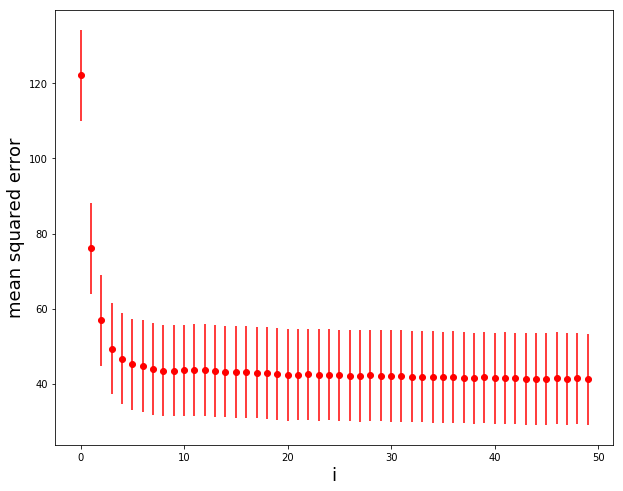

In [19]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111) 
# Set the axis lables
ax.set_xlabel('i', fontsize = 18)
ax.set_ylabel('mean squared error', fontsize = 18)
xaxis = np.array(range(0,50))
plt.errorbar(xaxis, result_mse,np.std(result_mse), color= 'red', label='A',linestyle='None', marker='o')

In [20]:
df = pd.DataFrame(data=np.array([[61.175, 6.154], [79.2378,36.398],[45.141,12.189]]), index= [ 'A', 'B','C'], columns=['mean', 'std'])
df

,mean,std
A,61.1750,6.154
B,79.2378,36.398
C,45.1410,12.189
